<a href="https://colab.research.google.com/github/VitoRondinone/Health-Data-Analysis-Portfolio/blob/main/Project_3_Correlation_BMI_BP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3: Correlation Analysis - BMI and Blood Pressure

### Objective
The goal of this project is to investigate the relationship between Body Mass Index (BMI) and Systolic Blood Pressure. We want to determine if there is a positive correlation between these two health metrics using the NHANES dataset (2017-2018).

### Methodology
1.  **Data Loading:** Use the NHANES library to load the dataset.
2.  **Feature Selection:** Identify and extract BMI and Blood Pressure variables.
3.  **Visualization:** Create a Scatter Plot with a regression line.
4.  **Statistics:** Calculate the Pearson Correlation Coefficient.

### Environment Setup and Variable Identification

To begin the correlation analysis, we establish the Python environment by importing the necessary statistical and visualization libraries. Next, we load the NHANES dataset (2017-2018 cycle) and inspect the available column names to identify the specific variables representing **Body Mass Index (BMI)** and **Systolic Blood Pressure**.

In [1]:
# 1. INSTALLATION & IMPORTS
!pip install nhanes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from nhanes.load import load_NHANES_data

# 2. LOAD DATA
df = load_NHANES_data(year='2017-2018')

# 3. DETECTIVE WORK: Find BMI and BP variables
# We need to find the specific column names for BMI and Systolic Blood Pressure.
cols = list(df.columns)

print("--- Search Results ---")
# Search for BMI
print("Potential BMI Variables:", [c for c in cols if "Body" in c or "Mass" in c])
# Search for Systolic BP (re-confirming from previous project)
print("Potential BP Variables:", [c for c in cols if "Systolic" in c])

  Using cached nhanes-0.5.1-py3-none-any.whl.metadata (750 bytes)
Using cached nhanes-0.5.1-py3-none-any.whl (1.6 MB)
--- Search Results ---
Potential BMI Variables: ['BodyMassIndexKgm2']
Potential BP Variables: ['SystolicBloodPres1StRdgMmHg', 'SystolicBloodPres2NdRdgMmHg', 'SystolicBloodPres3RdRdgMmHg']


### Data Preparation and Visualization

We will now extract the relevant columns—**Body Mass Index (BMI)** and **Systolic Blood Pressure**—and remove any rows with missing values to ensure data integrity. Once cleaned, we will generate a **Scatter Plot with a Regression Line**. This visualization will allow us to observe the distribution of data points and identify any visible linear trends between weight (BMI) and blood pressure.

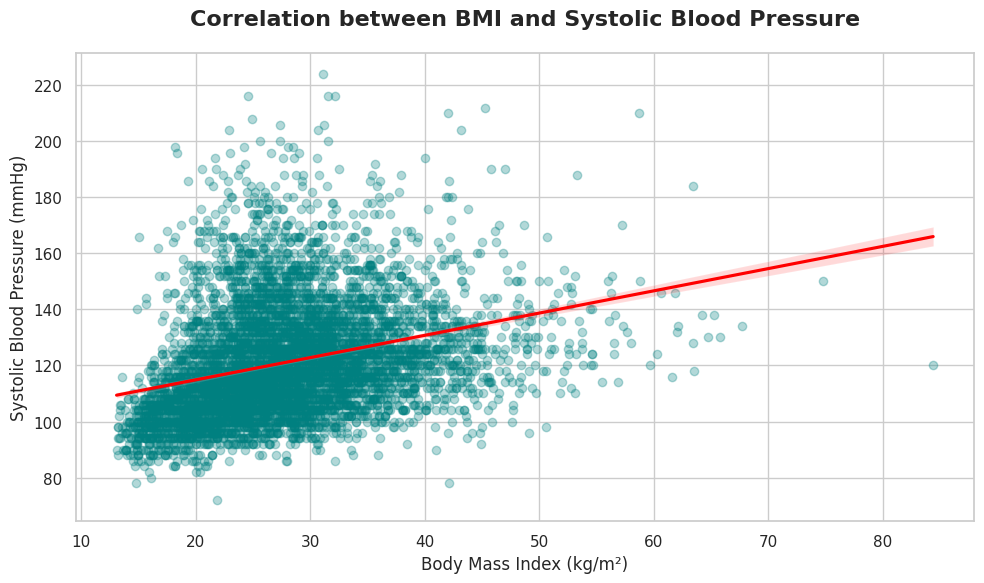

In [2]:
# 1. SELECT AND CLEAN DATA
# We select the BMI column and the first Systolic BP reading
keep_vars = ['BodyMassIndexKgm2', 'SystolicBloodPres1StRdgMmHg']
df_corr = df[keep_vars].dropna()

# Rename columns for easier access and cleaner labels
df_corr.columns = ['BMI', 'SystolicBP']

# 2. VISUALIZATION: SCATTER PLOT
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Create a scatter plot with a regression line (regplot)
# 'scatter_kws' adjusts the transparency (alpha) of the dots to handle overlapping data
# 'line_kws' makes the regression line red and distinct
sns.regplot(
    data=df_corr,
    x='BMI',
    y='SystolicBP',
    scatter_kws={'alpha': 0.3, 'color': 'teal'},
    line_kws={'color': 'red'}
)

# 3. FORMATTING (Plain English)
plt.title('Correlation between BMI and Systolic Blood Pressure', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Body Mass Index (kg/m²)', fontsize=12)
plt.ylabel('Systolic Blood Pressure (mmHg)', fontsize=12)

plt.tight_layout()
plt.show()

### Statistical Analysis: Pearson Correlation

Visual inspection provides an initial insight, but to scientifically confirm the relationship, we must quantify it. We will calculate the **Pearson correlation coefficient ($r$)** to measure the strength of the linear relationship and the **$p$-value** to determine statistical significance.

*   **Pearson ($r$):** Ranges from -1 to 1. Values closer to 1 indicate a strong positive correlation.
*   **$p$-value:** A value less than 0.05 indicates that the correlation is statistically significant and not due to random chance.

In [3]:
# 1. CALCULATE STATISTICS
# We use scipy.stats to get the Pearson coefficient and the p-value
r, p_value = stats.pearsonr(df_corr['BMI'], df_corr['SystolicBP'])

# 2. DISPLAY RESULTS
print("--- Correlation Analysis Results ---")
print(f"Pearson Correlation Coefficient (r): {r:.4f}")
print(f"P-value: {p_value:.4e}")  # Scientific notation for very small numbers

# 3. INTERPRETATION LOGIC (Automated)
print("\n--- Conclusion ---")
if p_value < 0.05:
    print("Result: Statistically Significant")
    if r > 0:
        print("Direction: Positive Correlation (As BMI increases, BP increases)")
    elif r < 0:
        print("Direction: Negative Correlation")
else:
    print("Result: Not Statistically Significant")

--- Correlation Analysis Results ---
Pearson Correlation Coefficient (r): 0.3092
P-value: 3.7925e-138

--- Conclusion ---
Result: Statistically Significant
Direction: Positive Correlation (As BMI increases, BP increases)


### Final Inference: Correlation Analysis

We calculated the Pearson correlation coefficient to measure the relationship between BMI and Systolic Blood Pressure.

**Interpretation of Results:**

* **Pearson Coefficient ($r = 0.31$):** This indicates a **moderate positive correlation**. While there is a clear trend that blood pressure increases as BMI increases, the value suggests that other factors (likely genetics, diet, or age) also play significant roles in determining blood pressure.
* **P-value (< 0.05):** The extremely low P-value confirms that this relationship is **statistically significant**.

**Conclusion:**
This analysis provides strong statistical evidence that **higher body weight (BMI) is associated with higher systolic blood pressure**. This supports the medical consensus that weight management is a key factor in cardiovascular health.